In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import math

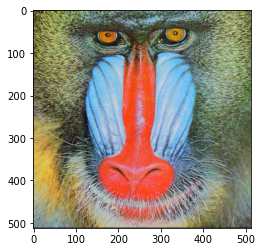

In [3]:
mandrill = imread("Downloads/mandrillFarbe.png")
plt.imshow(mandrill)

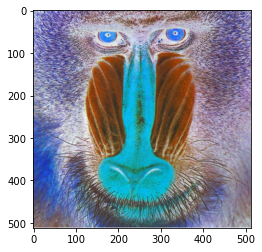

In [19]:
def rgb2cmy(input_img):
    img = np.copy(input_img).astype(np.float)
    img = img/255
    img[:,:,0] = 1 - img[:,:,0]
    img[:,:,1] = 1 - img[:,:,1]
    img[:,:,2] = 1 - img[:,:,2]
    img = (img*255).astype(np.uint8)
    return img

rgb_cmy = rgb2cmy(mandrill)
plt.imshow(rgb_cmy)

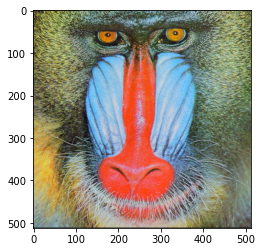

In [21]:
def cmy2rgb(input_img):
    img = np.copy(input_img).astype(np.float)
    img = img/255
    img[:,:,0] = 1 - img[:,:,0]
    img[:,:,1] = 1 - img[:,:,1]
    img[:,:,2] = 1 - img[:,:,2]
    img = (img*255).astype(np.uint8)
    return img

cmy_rgb = cmy2rgb(rgb_cmy)
plt.imshow(cmy_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


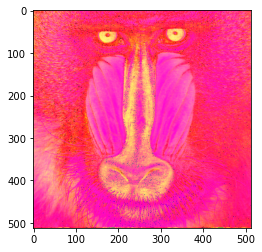

In [24]:
def rgb2hsi(input_img):
    img = np.copy(input_img).astype(np.float)
    img = img/255
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    theta = np.zeros((img.shape[0], img.shape[1]))
    H = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(r[y, x] == g[y, x] == b[y, x]):
                theta[y, x] = 0
                H[y, x] = theta[y, x]
            else:
                theta[y, x] = math.acos((0.5 * ((r[y, x] - g[y, x]) + (r[y, x] - b[y, x]))) / math.pow((math.pow((r[y, x] - g[y, x]), 2) + ((r[y, x] - b[y, x]) * (g[y, x] - b[y, x]))), 0.5))
                theta[y, x] = np.degrees(theta[y, x])
                if b[y, x] > g[y, x]:
                    H[y, x] = 360 - theta[y, x]
                else:
                    H[y, x] = theta[y, x]
    
    S = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(r[y, x] == g[y, x] == b[y, x] == 0):
                S[y, x] = 1
            else:
                S[y, x] = 1 - ((3/(r[y, x] + g[y, x] + b[y, x])) * min(r[y, x], min(g[y, x], b[y, x])))
    
    I = (r + g + b)/3
      
    return np.dstack((H, S, I))

rgb_hsi = rgb2hsi(mandrill)
plt.imshow(rgb_hsi)

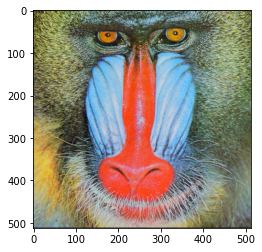

In [25]:
def hsi2rgb(image):
    img = np.copy(image)
    H = img[:,:,0]
    S = img[:,:,1]
    I = img[:,:,2]
    
    r = np.zeros((img.shape[0], img.shape[1]))
    g = np.zeros((img.shape[0], img.shape[1]))
    b = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(0 <= H[y, x] < 120):
                hue = H[y, x]
                b[y, x] = I[y, x] * (1 - S[y, x])
                r[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue)))))
                g[y, x] = (3 * I[y, x]) - (r[y, x] + b[y, x])
            
            elif(120 <= H[y, x] < 240):
                hue = H[y, x] - 120
                r[y, x] = I[y, x] * (1 - S[y, x])
                g[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue)))))
                b[y, x] = (3 * I[y, x]) - (r[y, x] + g[y, x])
            
            elif(240 <= H[y, x] < 360):
                hue = H[y, x] - 240
                g[y, x] = I[y, x] * (1 - S[y, x])
                b[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue)))))
                r[y, x] = (3 * I[y, x]) - (g[y, x] + b[y, x])
    
    return (np.dstack((r, g, b)) * 255).astype(np.uint8)

hsi_rgb = hsi2rgb(rgb_hsi)
plt.imshow(hsi_rgb)